In [7]:
# Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


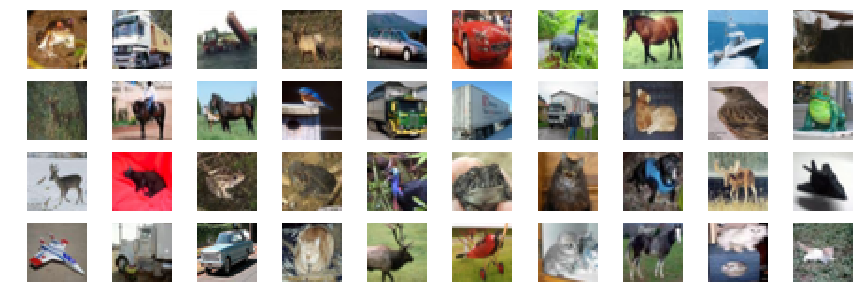

In [9]:
# Show a few samples
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for it_k in range(40):
    plt.subplot(4, 10, it_k+1)
    plt.imshow(x_train[it_k])
    plt.axis('off')
plt.show()

In [10]:
x_train = x_train
x_test = x_test
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
# Format labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])

(50000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [101]:
# Create NN
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 512)               0         
__________

In [102]:
# Optimization parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
# Training
batch_size = 64
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.25, shuffle=True)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 328s 9ms/step - loss: 2.0771 - acc: 0.2313 - val_loss: 1.8042 - val_acc: 0.3567
Epoch 2/10
37500/37500 [==============================] - 305s 8ms/step - loss: 1.7098 - acc: 0.3865 - val_loss: 1.6905 - val_acc: 0.3957
Epoch 3/10
37500/37500 [==============================] - 301s 8ms/step - loss: 1.5962 - acc: 0.4316 - val_loss: 1.6094 - val_acc: 0.4270
Epoch 4/10
37500/37500 [==============================] - 302s 8ms/step - loss: 1.5229 - acc: 0.4563 - val_loss: 1.5279 - val_acc: 0.4592
Epoch 5/10
37500/37500 [==============================] - 320s 9ms/step - loss: 1.4645 - acc: 0.4769 - val_loss: 1.4495 - val_acc: 0.4838
Epoch 6/10
37500/37500 [==============================] - 430s 11ms/step - loss: 1.4231 - acc: 0.4943 - val_loss: 1.4347 - val_acc: 0.4922
Epoch 7/10
37500/37500 [==============================] - 398s 11ms/step - loss: 1.3863 - acc: 0.5054 - val_loss: 1.4028 

In [104]:
# Test on test data
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[1.3361591616630555, 0.5233]


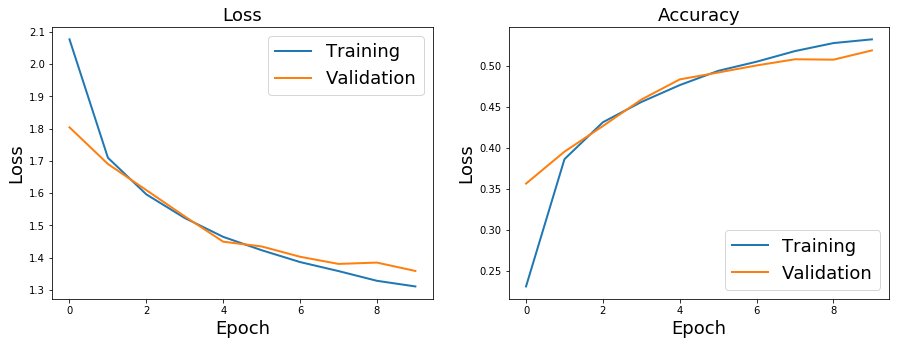

In [105]:
# Plot training loss
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(model.history.history['acc'], label='Training', linewidth=2)
plt.plot(model.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [110]:
#batch size 4
# Training
batch_size = 4
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))


Train on 50000 samples, validate on 12500 samples
Epoch 1/10
   16/50000 [..............................] - ETA: 13:32:16 - loss: 1.2252 - acc: 0.6250

C:\Users\Gaby\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251479). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 661s 13ms/step - loss: 1.4186 - acc: 0.4936 - val_loss: 1.3050 - val_acc: 0.5326
Epoch 2/10
50000/50000 [==============================] - 642s 13ms/step - loss: 1.3198 - acc: 0.5282 - val_loss: 1.2354 - val_acc: 0.5619
Epoch 3/10
50000/50000 [==============================] - 639s 13ms/step - loss: 1.2375 - acc: 0.5590 - val_loss: 1.2190 - val_acc: 0.5588
Epoch 4/10
50000/50000 [==============================] - 642s 13ms/step - loss: 1.1726 - acc: 0.5841 - val_loss: 1.1112 - val_acc: 0.6063
Epoch 5/10
50000/50000 [==============================] - 640s 13ms/step - loss: 1.1169 - acc: 0.6060 - val_loss: 1.0037 - val_acc: 0.6423
Epoch 6/10
50000/50000 [==============================] - 658s 13ms/step - loss: 1.0661 - acc: 0.6236 - val_loss: 0.9805 - val_acc: 0.6507
Epoch 7/10
50000/50000 [==============================] - 635s 13ms/step - loss: 1.0236 - acc: 0.6397 - val_loss: 0.9274 - val_acc: 0.6758
Epoch 8/10
50000/50000 [==============

In [111]:
#batch size 16
# Training
batch_size = 16
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))


Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 449s 9ms/step - loss: 0.7852 - acc: 0.7235 - val_loss: 0.7360 - val_acc: 0.7377
Epoch 2/10
50000/50000 [==============================] - 449s 9ms/step - loss: 0.7783 - acc: 0.7253 - val_loss: 0.7194 - val_acc: 0.7482
Epoch 3/10
50000/50000 [==============================] - 453s 9ms/step - loss: 0.7565 - acc: 0.7335 - val_loss: 0.6716 - val_acc: 0.7630
Epoch 4/10
50000/50000 [==============================] - 456s 9ms/step - loss: 0.7370 - acc: 0.7373 - val_loss: 0.6844 - val_acc: 0.7626
Epoch 5/10
50000/50000 [==============================] - 451s 9ms/step - loss: 0.7224 - acc: 0.7453 - val_loss: 0.6638 - val_acc: 0.7689
Epoch 6/10
50000/50000 [==============================] - 452s 9ms/step - loss: 0.7066 - acc: 0.7499 - val_loss: 0.6566 - val_acc: 0.7685
Epoch 7/10
50000/50000 [==============================] - 451s 9ms/step - loss: 0.6931 - acc: 0.7535 - val_loss: 0.6182 - 

In [112]:
#batch size 128
# Training
batch_size = 128
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))


Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 376s 8ms/step - loss: 0.5478 - acc: 0.8105 - val_loss: 0.5225 - val_acc: 0.8207
Epoch 2/10
50000/50000 [==============================] - 374s 7ms/step - loss: 0.5344 - acc: 0.8151 - val_loss: 0.5155 - val_acc: 0.8249
Epoch 3/10
50000/50000 [==============================] - 374s 7ms/step - loss: 0.5305 - acc: 0.8162 - val_loss: 0.5081 - val_acc: 0.8259
Epoch 4/10
50000/50000 [==============================] - 374s 7ms/step - loss: 0.5281 - acc: 0.8174 - val_loss: 0.5088 - val_acc: 0.8265
Epoch 5/10
50000/50000 [==============================] - 373s 7ms/step - loss: 0.5255 - acc: 0.8170 - val_loss: 0.5022 - val_acc: 0.8264
Epoch 6/10
50000/50000 [==============================] - 373s 7ms/step - loss: 0.5225 - acc: 0.8174 - val_loss: 0.4975 - val_acc: 0.8297
Epoch 7/10
50000/50000 [==============================] - 373s 7ms/step - loss: 0.5192 - acc: 0.8185 - val_loss: 0.4996 - 

In [113]:
#batch size 256
# Training
batch_size = 256
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))

# Save model
model.save('mymodel.h256')

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 365s 7ms/step - loss: 0.4816 - acc: 0.8342 - val_loss: 0.4665 - val_acc: 0.8404
Epoch 2/10
50000/50000 [==============================] - 362s 7ms/step - loss: 0.4768 - acc: 0.8352 - val_loss: 0.4632 - val_acc: 0.8424
Epoch 3/10
50000/50000 [==============================] - 363s 7ms/step - loss: 0.4763 - acc: 0.8352 - val_loss: 0.4561 - val_acc: 0.8450
Epoch 4/10
50000/50000 [==============================] - 362s 7ms/step - loss: 0.4716 - acc: 0.8370 - val_loss: 0.4526 - val_acc: 0.8480
Epoch 5/10
50000/50000 [==============================] - 362s 7ms/step - loss: 0.4691 - acc: 0.8387 - val_loss: 0.4481 - val_acc: 0.8492
Epoch 6/10
50000/50000 [==============================] - 363s 7ms/step - loss: 0.4690 - acc: 0.8383 - val_loss: 0.4448 - val_acc: 0.8488
Epoch 7/10
50000/50000 [==============================] - 368s 7ms/step - loss: 0.4652 - acc: 0.8387 - val_loss: 0.4504 - 

In [116]:
# Create NN punto  10
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 32, 32, 128)       9728      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 5, 5, 64)          73792     
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 256)               0         
__________

In [118]:
# Optimization parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
# Training
batch_size = 256
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 683s 14ms/step - loss: 1.9144 - acc: 0.3012 - val_loss: 1.8826 - val_acc: 0.3158
Epoch 2/10
50000/50000 [==============================] - 593s 12ms/step - loss: 1.8247 - acc: 0.3346 - val_loss: 1.7808 - val_acc: 0.3474
Epoch 3/10
50000/50000 [==============================] - 591s 12ms/step - loss: 1.7561 - acc: 0.3585 - val_loss: 1.7282 - val_acc: 0.3734
Epoch 4/10
50000/50000 [==============================] - 589s 12ms/step - loss: 1.7075 - acc: 0.3784 - val_loss: 1.6785 - val_acc: 0.3870
Epoch 5/10
50000/50000 [==============================] - 594s 12ms/step - loss: 1.6704 - acc: 0.3938 - val_loss: 1.6429 - val_acc: 0.3983
Epoch 6/10
50000/50000 [==============================] - 588s 12ms/step - loss: 1.6355 - acc: 0.4064 - val_loss: 1.6128 - val_acc: 0.4174
Epoch 7/10
50000/50000 [==============================] - 590s 12ms/step - loss: 1.6071 - acc: 0.4192 - val_loss: 1.

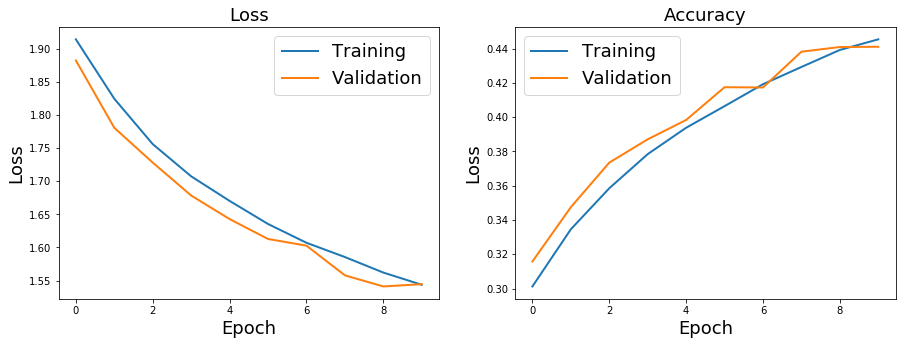

In [121]:
# Plot training loss
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(model.history.history['acc'], label='Training', linewidth=2)
plt.plot(model.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [123]:
# Test on test data
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[1.5622777137756347, 0.4403]


In [128]:
# Create NN punto 11
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 4, 4, 32)          18464     
__________

In [129]:
# Optimization parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
# Training
batch_size = 256
num_epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1,validation_data=(np.asarray(train_test_split(x_train, test_size=0.25, random_state=42)[1]), np.asarray(train_test_split(y_train, test_size=0.25, random_state=42)[1])))

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 1229s 33ms/step - loss: 2.3027 - acc: 0.0993 - val_loss: 2.3027 - val_acc: 0.0987
Epoch 2/10
37500/37500 [==============================] - 1207s 32ms/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3027 - val_acc: 0.0952
Epoch 3/10
37500/37500 [==============================] - 1199s 32ms/step - loss: 2.3027 - acc: 0.1001 - val_loss: 2.3027 - val_acc: 0.0952
Epoch 4/10
37500/37500 [==============================] - 1198s 32ms/step - loss: 2.3026 - acc: 0.1016 - val_loss: 2.3027 - val_acc: 0.0952
Epoch 5/10
37500/37500 [==============================] - 1194s 32ms/step - loss: 2.3026 - acc: 0.1008 - val_loss: 2.3027 - val_acc: 0.0952
Epoch 6/10
37500/37500 [==============================] - 1193s 32ms/step - loss: 2.3026 - acc: 0.0999 - val_loss: 2.3027 - val_acc: 0.0952
Epoch 7/10
37500/37500 [==============================] - 1198s 32ms/step - loss: 2.3026 - acc: 0.1016 - val_l

In [132]:
# Test on test data
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[2.302600746536255, 0.1]


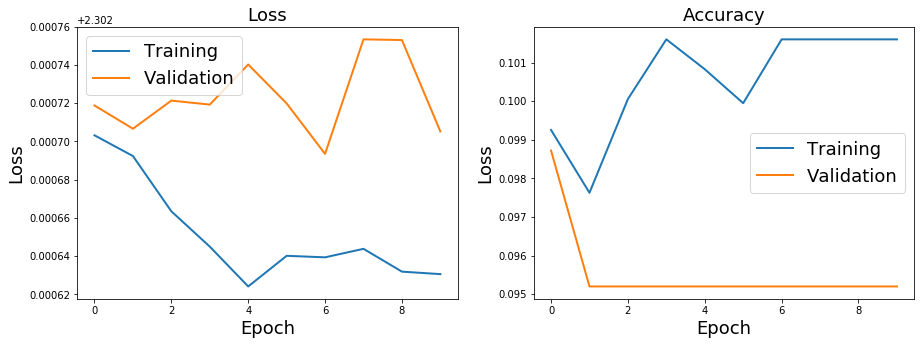

In [133]:
# Plot training loss
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(model.history.history['acc'], label='Training', linewidth=2)
plt.plot(model.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [139]:
#el mejor set TM


In [18]:
# Create NN
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               409800    
__________

In [19]:
# Optimization parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# La mejor red
batch_size = 256
num_epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.25, shuffle=True)

Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 289s 8ms/step - loss: 1.0277 - acc: 0.6389 - val_loss: 1.1114 - val_acc: 0.6086
Epoch 2/15
37500/37500 [==============================] - 285s 8ms/step - loss: 1.0023 - acc: 0.6483 - val_loss: 1.0957 - val_acc: 0.6147
Epoch 3/15
37500/37500 [==============================] - 282s 8ms/step - loss: 0.9807 - acc: 0.6556 - val_loss: 1.0984 - val_acc: 0.6158
Epoch 4/15
37500/37500 [==============================] - 289s 8ms/step - loss: 0.9583 - acc: 0.6617 - val_loss: 1.1113 - val_acc: 0.6141
Epoch 5/15
37500/37500 [==============================] - 297s 8ms/step - loss: 0.9377 - acc: 0.6676 - val_loss: 1.1228 - val_acc: 0.6094
Epoch 6/15
37500/37500 [==============================] - 304s 8ms/step - loss: 0.9163 - acc: 0.6760 - val_loss: 1.1198 - val_acc: 0.6138
Epoch 7/15
37500/37500 [==============================] - 283s 8ms/step - loss: 0.8983 - acc: 0.6850 - val_loss: 1.1492 - 

In [24]:
import numpy as np
# Predict classes for test set
y_test_pred = model.predict(x_test).round()
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

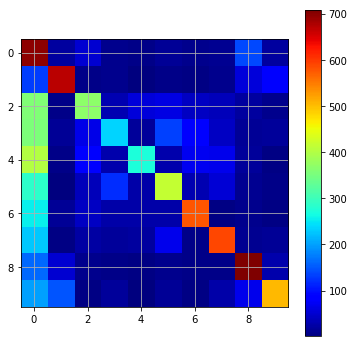

In [25]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

(5, 5, 3, 64)
(64,)


ValueError: num must be 1 <= num <= 32, not 33

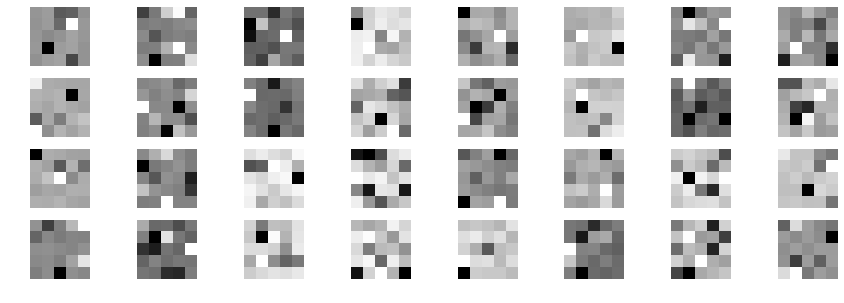

In [56]:
# Get kernels
Omega = model.layers[0].get_weights()
print(Omega[0].shape)
print(Omega[1].shape)
Kernels = Omega[0].reshape(192, Omega[0].shape[0], Omega[0].shape[1])

# Visualize them
plt.figure(figsize=(15, 5))
for it_k, k in enumerate(Kernels):
    plt.subplot(4, 8, it_k+1)
    plt.imshow(k, cmap='gray')
    plt.axis('off')
plt.show()

(3, 3, 64, 32)
(32,)


ValueError: num must be 1 <= num <= 32, not 33

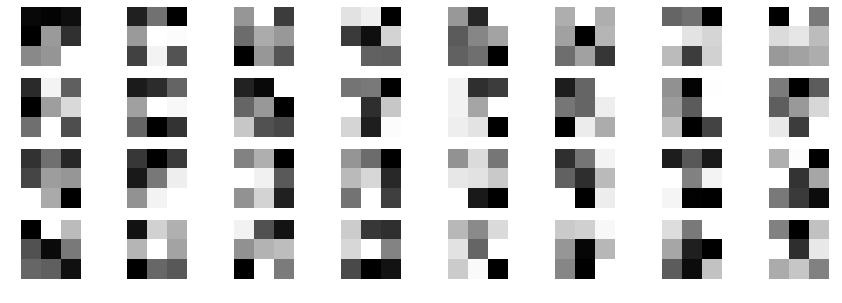

In [72]:
# Get kernels
Omega = model.layers[4].get_weights()
print(Omega[0].shape)
print(Omega[1].shape)
Kernels = Omega[0].reshape(2048, Omega[0].shape[0], Omega[0].shape[1])

# Visualize them
plt.figure(figsize=(15, 5))
for it_k, k in enumerate(Kernels):
    plt.subplot(4, 8, it_k+1)
    plt.imshow(k, cmap='gray')
    plt.axis('off')
plt.show()

In [73]:
# Submodel for visualizing intermediate output
from keras.models import Model
mod1 = Model(model.input, model.layers[1].output)
mod1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22_input (InputLayer) (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


(16, 16, 64)


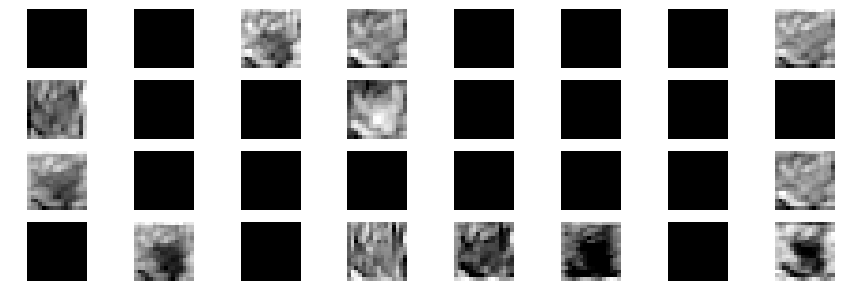

In [74]:
# Predict and reshape
interm_out = mod1.predict(x_test[4].reshape(1, x_test.shape[1], x_test.shape[2], x_test.shape[3]))
interm_out = interm_out.reshape(interm_out.shape[1], interm_out.shape[2], interm_out.shape[3])
print(interm_out.shape)

# Visualize them
plt.figure(figsize=(15, 5))
for it_k in range(32):
    plt.subplot(4, 8, it_k+1)
    plt.imshow(interm_out[:,:,it_k], cmap='gray')
    plt.axis('off')
plt.show()

In [80]:
# Submodel for visualizing intermediate output
from keras.models import Model
mod2 = Model(model.input, model.layers[7].output)
mod2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22_input (InputLayer) (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [89]:
# Predict and reshape
interm_out = mod2.predict(x_test[4].reshape(1, x_test.shape[1], x_test.shape[2], x_test.shape[3]))
interm_out = interm_out.reshape(10)
print(interm_out.shape)


(10,)
